<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/implementations/linear_models/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Perceptron from scratch***
*It is based on MCP Neuron model which automatically learns the optimal weight coeffs. that would be multiplied with the i/p features in order to make the decision weather a neuron fires(transmits a signal) or not. In context of classification, such an algorithm predicts weather a new data point belongs to one class or the other.*


In [ ]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features], X ∈ R^(n*d)
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """

        #RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions.
        rgen = np.random.RandomState(seed=self.random_state)

        # here we are initializing the weight vector with mean=0, std_dev=0.01
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)
        # initializing bias = 0
        # self.b_ = np.float_(0.)
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for x_i, target in zip(X,y):
                update = self.eta * (target - self.predict(x_i))
                self.w_[0] += update
                self.w_[1:] += update*x_i
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        '''Calculate the net input'''
        return np.dot(X,self.w_[1:]) + self.w_[0]

    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X)>=0.0, 1, 0)

### Applying Perceptron to iris dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(s, header=None, encoding='utf-8')
df.columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


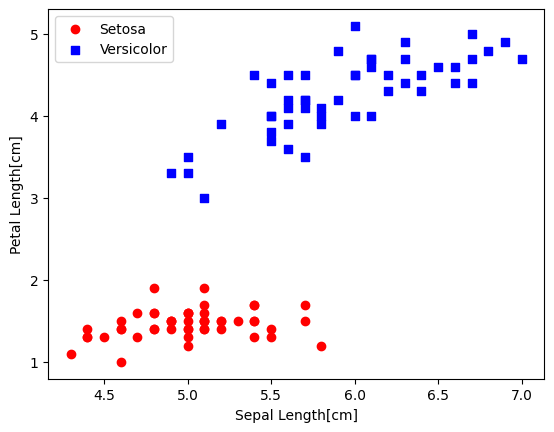

In [ ]:
# For perceptron we'll only consider only 2 categories and 2 flower types
# Extracting Setosa(0), Versicolor(1) and sepal length & petal length

# select setosa & versicolor
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa', 0, 1)

# extract sepal length & petal length
X = df.iloc[0:100, [0,2]].values


# plot data

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel("Sepal Length[cm]")
plt.ylabel("Petal Length[cm]")
plt.legend()
plt.show();

In [ ]:
# Here we can clearly see that data is linearly seperable, thus perceptron should classify correcly

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

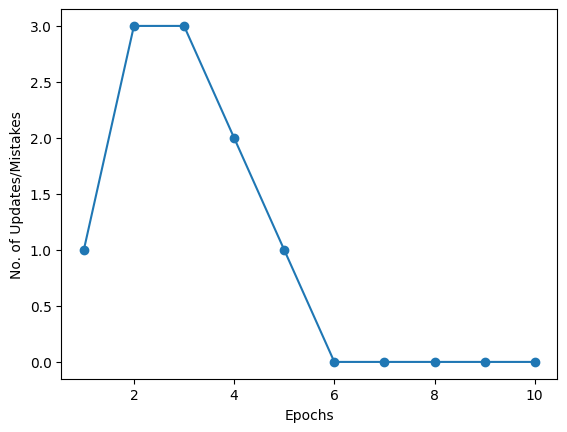

In [ ]:
# Here we can clearly see that data is linearly seperable, thus perceptron should classify correcly

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("No. of Updates/Mistakes")
plt.show();

### A function for plotting decision regions


In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)

  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())


  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], # x coordinate of those rows
                y=X[y == cl, 1], # y coordinate
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

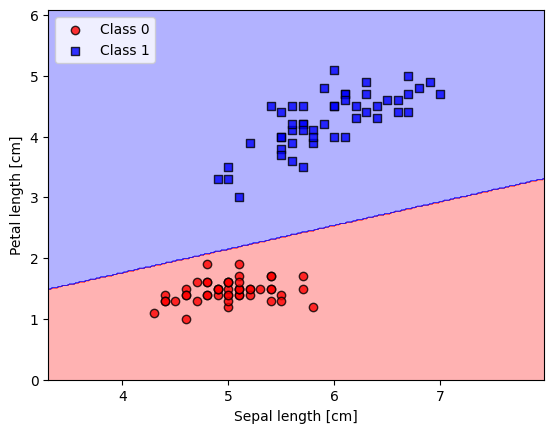

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show();